In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Reading the dataset 
df = pd.read_csv('data/train.csv')

In [3]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.shape

(8523, 12)

In [5]:
# Checking the null/blank data
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
# Checking percentage of missing values in each column 
df.isnull().mean() * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [7]:
# Checking for duplicate data
df.duplicated().sum()

0

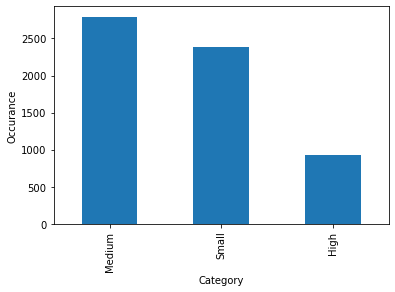

In [8]:
# Outlet_Size is a categorical column
# Plotting the bar plot
df['Outlet_Size'].value_counts().plot(kind='bar')
plt.xlabel("Category")
plt.ylabel("Occurance")
plt.show()

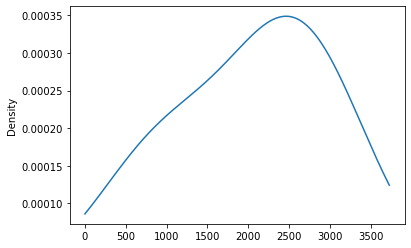

In [9]:
# Distribution plot of Outlet_Size column initially 
df['Outlet_Size'].value_counts().plot(kind='kde')
plt.show()

In [10]:
# Most frequent value in Outlet_Size
df['Outlet_Size'].mode()

0    Medium
dtype: object

Text(0.5, 1.0, 'Outlet_Size')

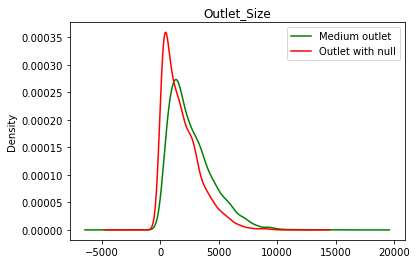

In [11]:
# Note 1: If there is MCAR and 5% or less data missing in categorical features. We replace with mode value.
# Note 2: If there is more that 5% values missing in categorical feature then we replace with new category like 'Missing' or other 

############# Handling missing data in feature 'Outlet_Size' ##############################
#### Test 1 - Filling with mode(Medium) value ########################

fig = plt.figure()
ax  = fig.add_subplot(111) 
df[df['Outlet_Size'] == 'Medium']['Item_Outlet_Sales'].plot(kind='kde', ax=ax, color='green')
df[df['Outlet_Size'].isnull()]['Item_Outlet_Sales'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Medium outlet', 'Outlet with null']
ax.legend(lines, labels, loc='best')

plt.title("Outlet_Size")

In [12]:
# Storing Item_Outlet_Sales data for Medium in temp variable so that we can see the change later 
temp = df[df['Outlet_Size'] == 'Medium']['Item_Outlet_Sales']
# Filling missing values with 'Medium' category 
# df['Outlet_Size'].fillna('Medium', inplace = True)

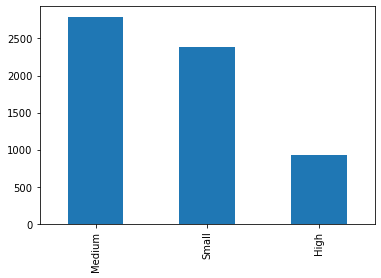

In [13]:
#  Bar plot of Outlet_Size after replacing with mode value
df['Outlet_Size'].value_counts().plot(kind='bar')
plt.show()

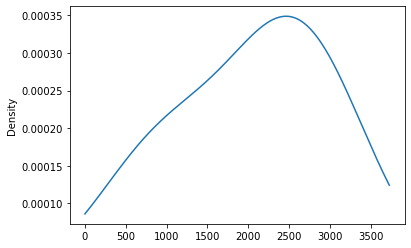

In [14]:
# Distribution plot of Outlet_Size column after replacing with mode value 
df['Outlet_Size'].value_counts().plot(kind='kde')
plt.show()

Text(0.5, 1.0, 'Outlet_Size')

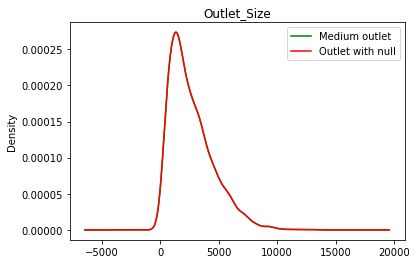

In [15]:
# Comparing the distribution between 'Medium' category after replcing with mode value 
fig = plt.figure()
ax = fig.add_subplot(111)
temp.plot(kind='kde', ax=ax, color='green')
df[df['Outlet_Size'] == 'Medium']['Item_Outlet_Sales'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Medium outlet', 'Outlet with null']
ax.legend(lines, labels, loc='best')

plt.title("Outlet_Size")

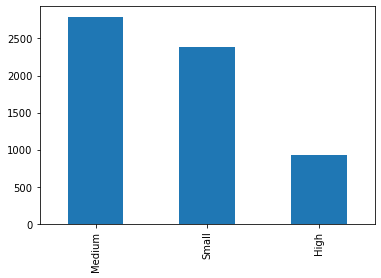

In [16]:
############# Handling missing data in feature 'Outlet_Size' ##############################
#### Test 2 - Filling missing data with new category('Missing') value ########################
df['Outlet_Size'].value_counts().plot(kind='bar')
plt.show()

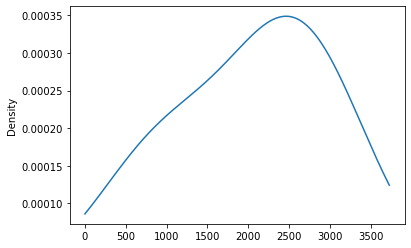

In [17]:
df['Outlet_Size'].value_counts().plot(kind='kde')
plt.show()

In [18]:
# Replacing null values with new category
df['Outlet_Size'].fillna('Missing', inplace=True)

<AxesSubplot:>

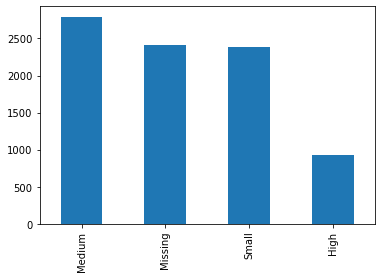

In [19]:
df['Outlet_Size'].value_counts().plot(kind='bar')

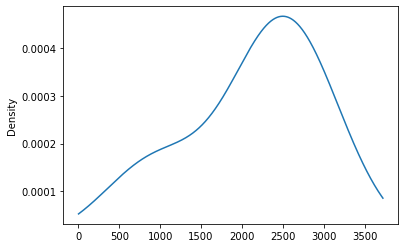

In [20]:
df['Outlet_Size'].value_counts().plot(kind='kde')
plt.show()

In [21]:
############# Handling missing data in feature 'Outlet_Size' ##############################
## Conclusion: So to fill missing value in 'Outlet_Size' we will replace it with new custom category 'Missing'

C:\Users\tarun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


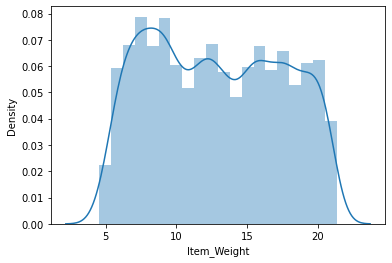

In [22]:
############ ------ Analysis to fill missing values in 'Item_Weight' features ------ ##############
# Note 1: If there is MCAR and 5% or less data missing in numerical features. We replace with mean/median value.
#########################  Test 1: Replaing with mean/median value #######################

# 'Item_Weight' has 17.16% data missing
# Plotting distribution chart for 'Item_Weight'
sns.distplot(df['Item_Weight'])
plt.show()

In [23]:

item_weight_mean = df['Item_Weight'].mean()
item_weight_median = df['Item_Weight'].median()
# Creating temporary columns 
df['Item_Weight_mean']   = df['Item_Weight'].fillna(item_weight_mean)
df['Item_Weight_median'] = df['Item_Weight'].fillna(item_weight_median)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mean,Item_Weight_median
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800,19.20,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,8.93


C:\Users\tarun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tarun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Weight_median', ylabel='Density'>

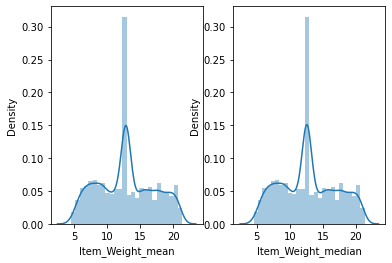

In [24]:
# Distribution plot of item_weight with mean and median value replacement 
plt.subplot(1,2,1)
sns.distplot(df['Item_Weight_mean'])
plt.subplot(1,2,2)
sns.distplot(df['Item_Weight_median'])
# colclusion: As distribution is changing drastically.

In [25]:
# Checking the variance before and after filling missing values with mean median 
print("original 'Item_Weight' column variance: ", df['Item_Weight'].var())
print("Item_Weight variance after mean imputation: ",df['Item_Weight_mean'].var())
print("Item_Weight variance after median imputation: ",df['Item_Weight_median'].var())

original 'Item_Weight' column variance:  21.56168825983637
Item_Weight variance after mean imputation:  17.86012173506042
Item_Weight variance after median imputation:  17.869561454073366


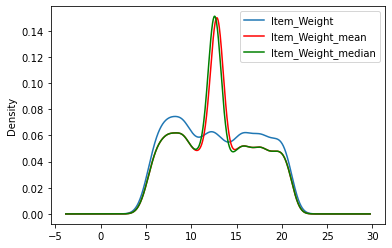

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution 
df['Item_Weight'].plot(kind='kde', ax=ax)

# variable distribution after mean imputation 
df['Item_Weight_mean'].plot(kind='kde', ax=ax, color='red')

# variable distribution after median imputation 
df['Item_Weight_median'].plot(kind='kde', ax=ax, color='green')

# Add legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

plt.show()

In [27]:
# Checking the covariance of Item_Weight, Item_Weight_mean, Item_Weight_median column with other column 
# After mean median imputation covariance should not change in a large quantity
# It ranges between -infinity to infinity
df.cov()
# Covariance is also change in a high value 

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Weight_mean,Item_Weight_median
Item_Weight,21.561688,-0.003172,7.865693,-0.354551,1.005608e+02,21.561688,21.561688
Item_Visibility,-0.003172,0.002662,-0.004225,-0.032325,-1.132561e+01,-0.002627,-0.003090
Item_MRP,7.865693,-0.004225,3878.183909,2.617143,6.031749e+04,6.515364,6.568277
Outlet_Establishment_Year,-0.354551,-0.032325,2.617143,70.086372,-7.019621e+02,-0.293684,0.273879
Item_Outlet_Sales,100.560811,-11.325611,60317.485612,-701.962133,2.912141e+06,83.297203,69.922314
Item_Weight_mean,21.561688,-0.002627,6.515364,-0.293684,8.329720e+01,17.860122,17.860122
Item_Weight_median,21.561688,-0.003090,6.568277,0.273879,6.992231e+01,17.860122,17.869561


In [28]:
# Correlation. it ranges between -1 to 1.
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Weight_mean,Item_Weight_median
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123,1.000000,1.000000
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625,-0.012049,-0.014168
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574,0.024756,0.024951
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135,-0.008301,0.007739
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000,0.011550,0.009693
Item_Weight_mean,1.000000,-0.012049,0.024756,-0.008301,0.011550,1.000000,0.999736
Item_Weight_median,1.000000,-0.014168,0.024951,0.007739,0.009693,0.999736,1.000000


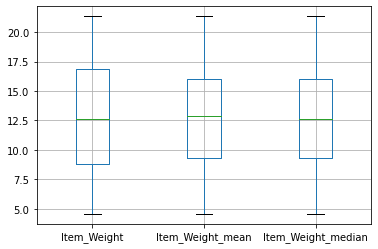

In [29]:
# Checking the boxplot
df[['Item_Weight', 'Item_Weight_mean', 'Item_Weight_median']].boxplot()
plt.show()
# Although outliers are not created after mean/median imputation that is good

In [30]:
# Conclusion: Althougn there is more change in distribution but mean/median is not creating any outliers 
# so we can use mean/median imputation

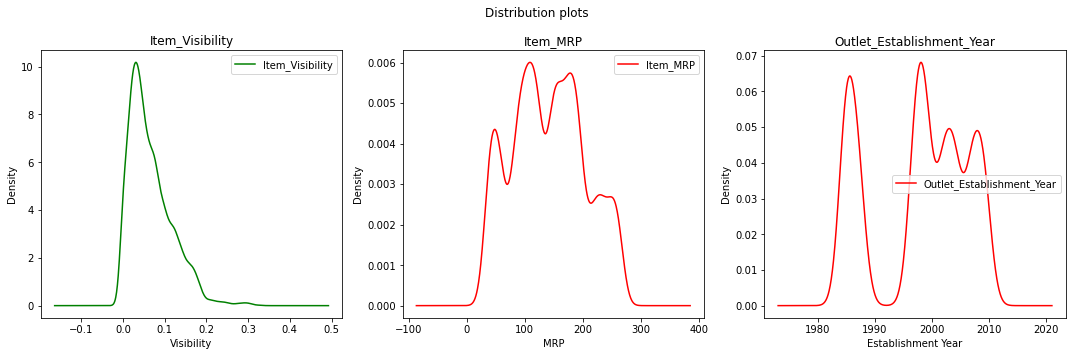

In [100]:
# Item_Visibility distribution
fig , (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
plt.suptitle("Distribution plots")

# ax1.plot( list(df['Item_Visibility'].index), list(df['Item_Visibility'].values) , color='green',)
df['Item_Visibility'].plot(kind='kde', color='green', ax=ax1)
ax1.set_title("Item_Visibility")
ax1.set_xlabel("Visibility")
ax1.legend()

df['Item_MRP'].plot(kind='kde', color='red', ax=ax2)
ax2.set_title("Item_MRP")
ax2.set_xlabel("MRP")
plt.xticks(rotation=30)
ax2.legend()

df['Outlet_Establishment_Year'].plot(kind='kde', color='red', ax=ax3)
ax3.set_title("Outlet_Establishment_Year")
ax3.set_xlabel("Establishment Year")
ax3.legend()

plt.tight_layout()
plt.show()

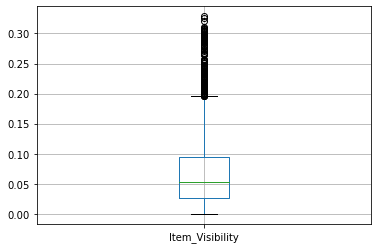

In [32]:
df[['Item_Visibility']].boxplot()
plt.show()

In [33]:
# Both z_score and standard_deviation methods are same
# If our data is properly distributed then we can use z_score or standard deviation method 
# Function to check outliers
def check_outliers_standard_deviation_method(data):
    outliers = []
    thershold = 3 
    mean = data.mean()
    std  = data.std()
    print(f"Mean value: {mean}, Standard Deviation: {std}")
    third_std_upper = mean + (3*std)
    print("3 standard deviation upper value: ",third_std_upper)
    third_std_lower = mean - (3*std)
    print("3 standard deviation lower value: ",third_std_lower)
    for i in data:
#         z_score = (i-mean)/std
        if (i < third_std_lower) or (i > third_std_upper):
            outliers.append(i)
    return outliers  

In [34]:
print("Outliers from standard deviation method: ",len(check_outliers_standard_deviation_method(df['Item_Visibility'])))

Mean value: 0.06613202877895127, Standard Deviation: 0.051597822321135196
3 standard deviation upper value:  0.22092549574235687
3 standard deviation lower value:  -0.08866143818445432
Outliers from standard deviation method:  95


In [35]:
# Both z_score and standard_deviation methods are same
# If our data is properly distributed then we can use z_score or standard deviation method 
# Function to check outliers
def check_outliers_z_score_method(data):
    outliers = []
    thershold = 3 
    mean = data.mean()
    std  = data.std()
    print(f"Mean value: {mean}, Standard Deviation: {std}")
    for i in data:
        z_score = (i-mean)/std
        if abs(z_score) > 3:
            outliers.append(i)
    return outliers 

In [36]:
print("Outliers from z_score method: ",len(check_outliers_z_score_method(df['Item_Visibility'])))

Mean value: 0.06613202877895127, Standard Deviation: 0.051597822321135196
Outliers from z_score method:  95


In [37]:
# If our data is not properly distributed then we can use IQR(Inter Quantile range) to detect outliers
def detect_outliers_by_iqr(data):
    outliers = []
    data = sorted(data)
    Q1   = np.percentile(data, 25)
    Q3   = np.percentile(data, 75)
    print(f"Q1 percentile: {Q1}, Q3 percentile: {Q3}")
    IQR = Q3-Q1
    lower_bound = Q1-(1.5*IQR)
    upper_bound = Q3+(1.5*IQR)
    print(f"Upper bound: {upper_bound}, Lower_bound: {lower_bound}")
    for i in data:
        if (i < lower_bound) or (i > upper_bound):
            outliers.append(i)
    return outliers    

In [38]:
print("Outliers by IQR method: ",len(detect_outliers_by_iqr(df['Item_Visibility'])))

Q1 percentile: 0.0269894775, Q3 percentile: 0.0945852925
Upper bound: 0.195979015, Lower_bound: -0.07440424500000001
Outliers by IQR method:  144


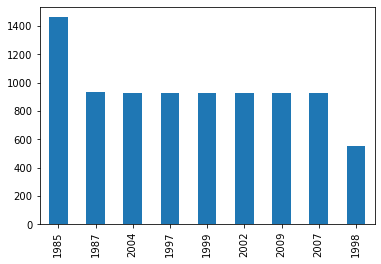

In [106]:
df['Outlet_Establishment_Year'].value_counts().plot(kind='bar')
plt.show()

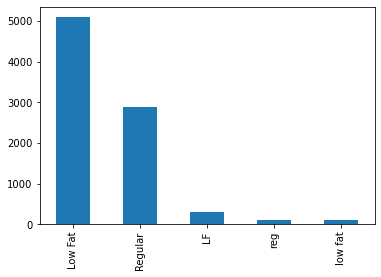

In [112]:
df['Item_Fat_Content'].value_counts().plot(kind='bar')
# df['Item_Fat_Content'].plot(kind='bar')
plt.show()

In [113]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [114]:
# Replacing 'LF' and 'low fat' with 'Low Fat' and 'reg' with 'Regular'
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})

In [115]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

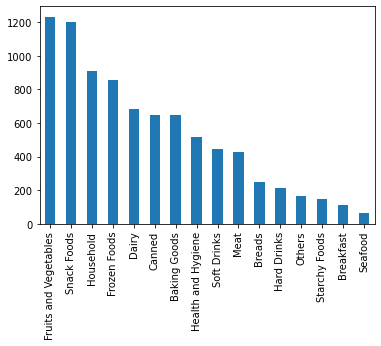

In [117]:
df['Item_Type'].value_counts().plot(kind='bar')
plt.show()

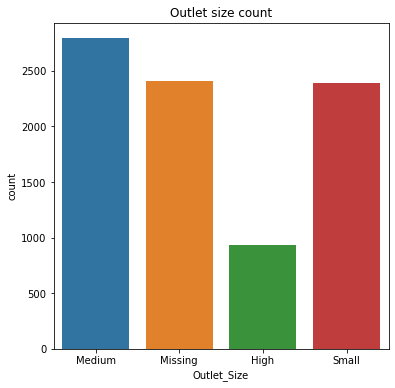

In [134]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=df)
plt.title("Outlet size count")
plt.show()

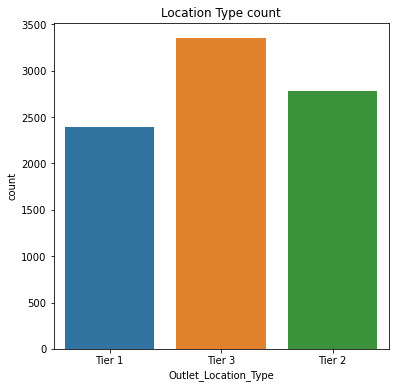

In [135]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Location_Type', data=df)
plt.title("Location Type count")
plt.show()

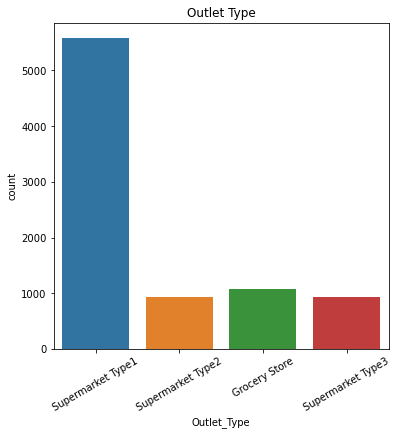

In [137]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Type', data=df)
plt.title("Outlet Type")
plt.xticks(rotation=30)
plt.show()

In [141]:
# Deleting temporary columns(Item_Weight_mean, Item_Weight_median)
df.drop(columns=['Item_Weight_median','Item_Weight_mean'], inplace=True)

In [145]:
# Define numerical and categorical columns
# Excluding 'Item_Outlet_Sales' as it is dependent feature
numerical_columns = [ col for col in df.columns if df[col].dtype != 'O' and col != 'Item_Outlet_Sales']
categorical_columns = [ col for col in df.columns if df[col].dtype == 'O']

print("We have {} numerical features: \n{} ".format(len(numerical_columns), numerical_columns))
print("\nWe have {} categorical features: \n{} ".format(len(categorical_columns), categorical_columns))

We have 4 numerical features: 
['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year'] 

We have 7 categorical features: 
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'] 
